# General Examples

A place to keep processing or other functionality that may lie outside of the standard pipeline.

In [ ]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
import suite2p
import mbo_utilities as mbo
from copy import deepcopy
import lbm_suite2p_python as lsp
import fastplotlib as fpl
import tifffile

import matplotlib as mpl
mpl.rcParams.update({
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.frameon': False,
    'figure.subplot.wspace': .01,
    'figure.subplot.hspace': .01,
    'figure.figsize': (18, 13),
    'ytick.major.left': True,
})
jet = mpl.cm.get_cmap('jet')
jet.set_bad(color='k')

fastplotlib version from git (0.4.0) and __version__ (0.5.0) don't match.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x007\x08\x06\x00\x00\x00\xb6\x1bw\x99\x…

## Image assembly

To preview data, run

``` python
scan = mbo.read_scan(files, join_contiguous=True)

widget = mbo.run_gui(scan)
widget.show()
```

In [2]:
scan = mbo.read_scan(r"D:\W2_DATA\kbarber\2025_03_01\mk301\green\*")

Detected possible escaped characters in the path. Use a raw string (r'...') or double backslashes.


In [5]:
animal_path = Path(r"D:\W2_DATA\kbarber\2025-02-27\mk301")
assembled_path = animal_path.joinpath("assembled")
save_path = animal_path.joinpath("results")
print(f"Saving raw tiffs to:        {assembled_path}")
print(f"Saving suite2p results to:  {save_path}")

Saving raw tiffs to:        D:\W2_DATA\kbarber\2025-02-27\mk301\assembled
Saving suite2p results to:  D:\W2_DATA\kbarber\2025-02-27\mk301\results


In [8]:
iw = fpl.ImageWidget(data=scan)

RFBOutputContext()

In [12]:
scan.shape

(5632, 14, 448, 448)

In [3]:
data = scan[50, :, :, :]
# data = np.random.randn(50, 2, 448, 448)
data.shape

(14, 448, 448)

RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
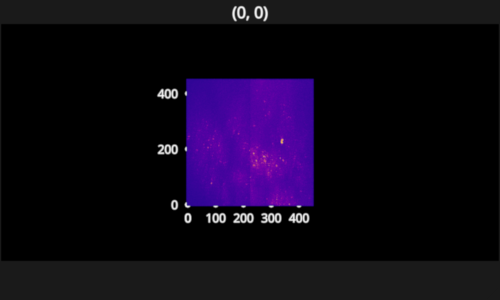

In [8]:
fig = fpl.Figure(cameras="3d")
volume = fig[0, 0].add_image_volume(data=data)
fig.show()

In [28]:
fig.renderer.blend_mode = "additive"

In [23]:
slider

IntSlider(value=3833, max=5632)

In [22]:
volume.cmap = "gnuplot2"

In [18]:
volume.interpolation = "linear"

In [17]:
slider

IntSlider(value=0, max=5632)

In [16]:
slider = IntSlider(0, 0, scan.shape[0])

def update_index(change):
    i = change["new"]
    volume.data = scan[i, :, :, :]

slider.observe(update_index, "value")

In [10]:
volume.world_object.world.scale_z = 15.0

In [19]:
hlut = fpl.HistogramLUTTool(volume.data.value, volume)
fig[0, 0].docks["right"].add_graphic(hlut)
fig[0, 0].docks["right"].size = 80

In [21]:
fig[0, 0].docks["right"].controller.enabled = False
fig[0, 0].docks["right"].camera.maintain_aspect = False
fig[0, 0].docks["right"].auto_scale(maintain_aspect=False)

In [11]:
from ipywidgets import IntSlider

In [10]:
input_files = mbo.get_files(assembled_path, str_contains='tif', max_depth=3)
input_files = [Path(x) for x in input_files]
input_files[:3]

[WindowsPath('D:/W2_DATA/kbarber/2025-02-27/mk301/assembled/plane_01.tiff'),
 WindowsPath('D:/W2_DATA/kbarber/2025-02-27/mk301/assembled/plane_02.tiff'),
 WindowsPath('D:/W2_DATA/kbarber/2025-02-27/mk301/assembled/plane_03.tiff')]

In [17]:
ops_files = mbo.get_files(save_path.parent, 'ops', 4)
ops_files[:3]

['D:\\W2_DATA\\kbarber\\2025-02-27\\mk301\\assembled\\suite2p\\plane0\\ops.npy',
 'D:\\W2_DATA\\kbarber\\2025-02-27\\mk301\\results\\plane_01\\plane0\\ops.npy',
 'D:\\W2_DATA\\kbarber\\2025-02-27\\mk301\\results\\plane_02\\plane0\\ops.npy']

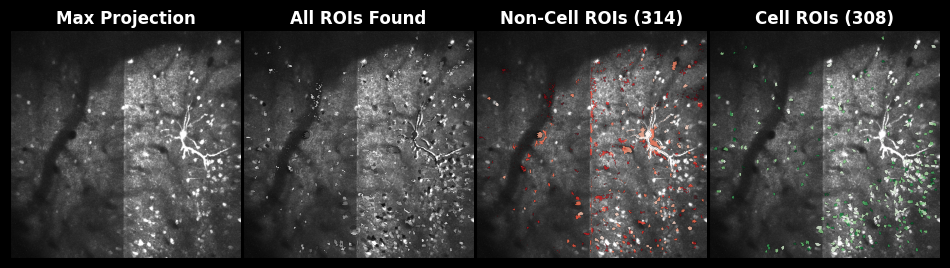

In [39]:
ops0 = lsp.load_ops(ops_files[-1])
lsp.plot_segmentation(ops0, './test_seg_overlay.png')

In [23]:
output_ops = ops0
stats_file = Path(output_ops['save_path']).joinpath('stat.npy')
iscell = np.load(Path(output_ops['save_path']).joinpath('iscell.npy'), allow_pickle=True)[:, 0].astype(int)
stats = np.load(stats_file, allow_pickle=True)
print(stats[0].keys())

dict_keys(['ypix', 'xpix', 'lam', 'med', 'footprint', 'mrs', 'mrs0', 'compact', 'solidity', 'npix', 'npix_soma', 'soma_crop', 'overlap', 'radius', 'aspect_ratio', 'npix_norm_no_crop', 'npix_norm', 'skew', 'std', 'neuropil_mask'])


In [8]:
ops0

{'suite2p_version': '0.14.4',
 'look_one_level_down': False,
 'fast_disk': 'D:\\W2_DATA\\kbarber\\2025-02-27\\mk301\\results',
 'delete_bin': False,
 'mesoscan': False,
 'bruker': False,
 'bruker_bidirectional': False,
 'h5py': [],
 'h5py_key': 'data',
 'nwb_file': '',
 'nwb_driver': '',
 'nwb_series': '',
 'save_path0': 'D:\\W2_DATA\\kbarber\\2025-02-27\\mk301\\results',
 'save_folder': 'plane_01',
 'subfolders': [],
 'move_bin': False,
 'nplanes': 1,
 'nchannels': 1,
 'functional_chan': 1,
 'tau': 1.5,
 'fs': 17.06863078416647,
 'force_sktiff': False,
 'frames_include': -1,
 'multiplane_parallel': False,
 'ignore_flyback': [],
 'preclassify': 0.0,
 'save_mat': False,
 'save_NWB': False,
 'combined': True,
 'aspect': np.float64(1.0),
 'do_bidiphase': 0,
 'bidiphase': 0,
 'bidi_corrected': False,
 'do_registration': True,
 'two_step_registration': False,
 'keep_movie_raw': False,
 'nimg_init': 300,
 'batch_size': 500,
 'maxregshift': 0.1,
 'align_by_chan': 1,
 'reg_tif': False,
 'reg_t

In [6]:
volume_stats_file = lbm_suite2p_python.volume.get_volume_stats(ops_files)
volume_stats_file  # runs stats and gives back the filename

'D:\\W2_DATA\\kbarber\\2025-02-17\\mk303\\results\\volume_stats.npy'

In [13]:
# plane, acc, rej, means, stds, ops-file
print(np.load(volume_stats_file, allow_pickle=True))

[( 1,  601,  601, 1504.95532227, 635.71911621, 'D:\\W2_DATA\\kbarber\\2025-02-10\\mk303\\results\\plane_01_demo\\plane0\\ops.npy')
 ( 2,  709,  709, 1729.17712402, 759.26446533, 'D:\\W2_DATA\\kbarber\\2025-02-10\\mk303\\results\\plane_02_demo\\plane0\\ops.npy')
 ( 3,  840,  840, 1682.04052734, 771.42297363, 'D:\\W2_DATA\\kbarber\\2025-02-10\\mk303\\results\\plane_03_demo\\plane0\\ops.npy')
 ( 4,  937,  937, 1581.18676758, 803.08453369, 'D:\\W2_DATA\\kbarber\\2025-02-10\\mk303\\results\\plane_04_demo\\plane0\\ops.npy')
 ( 5, 1163, 1163, 1454.5435791 , 746.58349609, 'D:\\W2_DATA\\kbarber\\2025-02-10\\mk303\\results\\plane_05_demo\\plane0\\ops.npy')
 ( 6, 1306, 1306, 1436.0411377 , 701.63793945, 'D:\\W2_DATA\\kbarber\\2025-02-10\\mk303\\results\\plane_06_demo\\plane0\\ops.npy')
 ( 7,  537,  537,   55.10420609,  25.497509  , 'D:\\W2_DATA\\kbarber\\2025-02-10\\mk303\\results\\plane_07_demo\\plane0\\ops.npy')
 ( 8, 1572, 1572, 1194.73181152, 573.11859131, 'D:\\W2_DATA\\kbarber\\2025-02-10\\m

In [7]:
stat_files = mbo.get_files(save_path.parent, 'stat.npy', max_depth=5)
stat_files[:3]

['D:\\W2_DATA\\kbarber\\2025-02-17\\mk303\\results\\plane_01\\plane0\\stat.npy',
 'D:\\W2_DATA\\kbarber\\2025-02-17\\mk303\\results\\plane_02\\plane0\\stat.npy',
 'D:\\W2_DATA\\kbarber\\2025-02-17\\mk303\\results\\plane_03\\plane0\\stat.npy']

## Compare multiple z-planes

In [6]:
plane_6 = tifffile.memmap(input_files[5])
plane_7 = tifffile.memmap(input_files[6])

RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
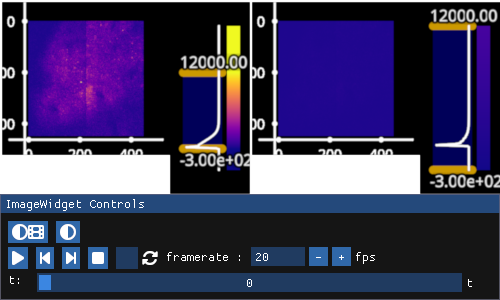

Draw error
Traceback (most recent call last):
  File "C:\Users\RBO\miniforge3\envs\lsp\lib\site-packages\rendercanvas\_coreutils.py", line 41, in log_exception
    yield
  File "C:\Users\RBO\miniforge3\envs\lsp\lib\site-packages\rendercanvas\base.py", line 409, in _draw_frame_and_present
    self._draw_frame()
  File "C:\Users\RBO\miniforge3\envs\lsp\lib\site-packages\fastplotlib\layouts\_imgui_figure.py", line 111, in _render
    self.imgui_renderer.render()
  File "C:\Users\RBO\miniforge3\envs\lsp\lib\site-packages\wgpu\utils\imgui\imgui_renderer.py", line 161, in render
    render_pass.end()
  File "C:\Users\RBO\miniforge3\envs\lsp\lib\site-packages\wgpu\backends\wgpu_native\_api.py", line 3289, in end
    libf.wgpuRenderPassEncoderEnd(self._internal)
  File "C:\Users\RBO\miniforge3\envs\lsp\lib\site-packages\wgpu\backends\wgpu_native\_helpers.py", line 394, in proxy_func
    raise wgpu_error  # the frame above is more interesting ↑↑
wgpu._classes.GPUValidationError: Validation Erro

In [10]:
iw = fpl.ImageWidget(data=[plane_6, plane_7], graphic_kwargs={"vmin": -300, "vmax": 12000})
iw.show()